# Importing libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
plt.rcParams['figure.figsize']=12,8

In [2]:
data=pd.read_csv('Automobile_data.csv')

In [3]:
data.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500


# Exploratory Data Analysis

In [4]:
data['make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [5]:
data.nunique()

symboling              6
normalized-losses     52
make                  22
fuel-type              2
aspiration             2
num-of-doors           3
body-style             5
drive-wheels           3
engine-location        2
wheel-base            53
length                75
width                 44
height                49
curb-weight          171
engine-type            7
num-of-cylinders       7
engine-size           44
fuel-system            8
bore                  39
stroke                37
compression-ratio     32
horsepower            60
peak-rpm              24
city-mpg              29
highway-mpg           30
price                187
dtype: int64

In [6]:
data['make'].value_counts()

toyota           32
nissan           18
mazda            17
honda            13
mitsubishi       13
subaru           12
volkswagen       12
peugot           11
volvo            11
dodge             9
bmw               8
mercedes-benz     8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
alfa-romero       3
jaguar            3
chevrolet         3
renault           2
mercury           1
Name: make, dtype: int64

In [7]:
data.shape

(205, 26)

In [8]:
data.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [9]:
data.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [10]:
data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


Although there are no missing values in the dataset, there are '?' which needs to be handled. Also, some numerical columns have the object dtypes

# Data Cleaning 

To check for the columns that have '?'

In [11]:
for col in data.columns:
    if('?' in data[col].values):
        print(col , " = " ,len(data[data[col]=='?']))

normalized-losses  =  41
num-of-doors  =  2
bore  =  4
stroke  =  4
horsepower  =  2
peak-rpm  =  2
price  =  4


C:\Users\Faith\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


To convert the '?' into null values

In [12]:
for col in data.columns:
    data[col]=data[col].replace('?', np.nan)
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [13]:
data.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Since the missing values in normalized-losses column is substantial, the column would be dropped. For the other columns like price etc it would be best to drop the missing values.

In [14]:
data=data.drop('normalized-losses',axis=1)

In [15]:
data.head(1)

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495


In [16]:
data.isnull().sum()

symboling            0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

In [17]:
data.dropna(inplace=True)

In [18]:
data.shape

(193, 25)

Initially, we had 205 rows, now that we have dropped the null values we are left with 193


Converting the data type to numeric

In [19]:
data.dtypes

symboling              int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [20]:
data.columns

Index(['symboling', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [21]:
data['price'] = pd.to_numeric(data['price'])
data['bore'] = pd.to_numeric(data['bore'])
data['horsepower'] = pd.to_numeric(data['horsepower'])
data['stroke'] = pd.to_numeric(data['stroke'])
data['peak-rpm'] = pd.to_numeric(data['peak-rpm'])

In [22]:
data.dtypes

symboling              int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm               int64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

# Charts and Graphs

To check for othe distribution of automobile prices.

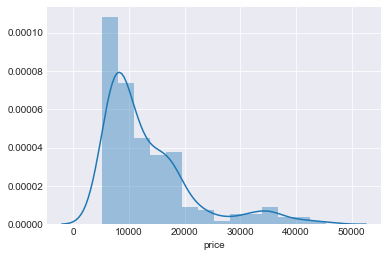

In [23]:
sns.distplot(data['price'])
plt.show()

To check the compare the automobiles side by side

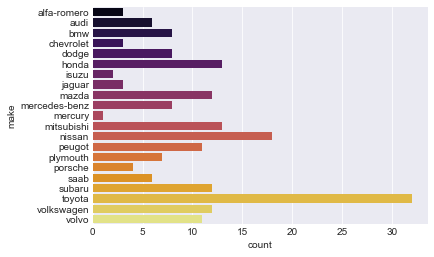

In [24]:
sns.countplot(y='make',data=data,palette='inferno')
plt.show()

Splitting the dataset into categorical and numerical dataframes

In [25]:
cat_feat=[]
for col in data.columns:
    if data[col].dtypes=='O':
        cat_feat.append(col)
 

In [26]:
cat_feat

['make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'engine-type',
 'num-of-cylinders',
 'fuel-system']

In [27]:
num_features=[]
for col in data.columns:
    if data[col].dtypes!='O':
        num_features.append(col)

In [28]:
num_features

['symboling',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price']

To convert the features extracted above into dataframes

In [29]:
data_cat=data[cat_feat]
data_num=data[num_features]

In [30]:
data_cat.head(1)

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi


checking for correlation between numerical features

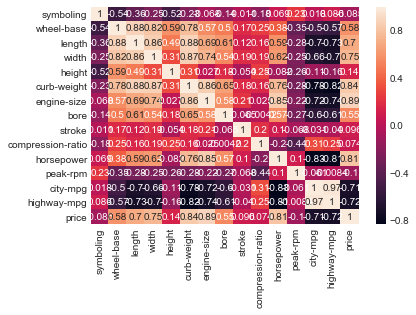

In [52]:
num=data_num.corr()
sns.heatmap(num, annot=True)

Correlation between price and numerical features

In [32]:
nume=data.select_dtypes(include=np.number)
n=nume.corr()

In [33]:
Num = n['price'].sort_values(ascending=False).to_frame()

In [34]:
Num

,price
price,1.000000
engine-size,0.888778
curb-weight,0.835368
horsepower,0.812453
width,0.754649
length,0.695928
wheel-base,0.584951
bore,0.546295
height,0.136234
stroke,0.096007


From our analysis above, we can conclude that engine-size and curb-weight are highly correlated price

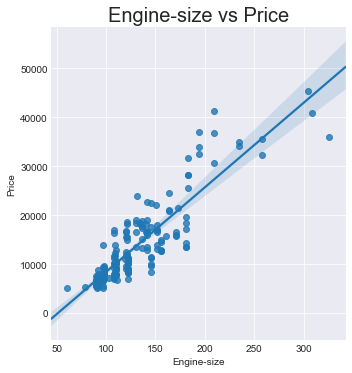

In [35]:
sns.lmplot(data=data, y='price',x='engine-size')
plt.xlabel('Engine-size',size=10)
plt.ylabel('Price',size=10)
plt.title('Engine-size vs Price', size=20)
plt.show()

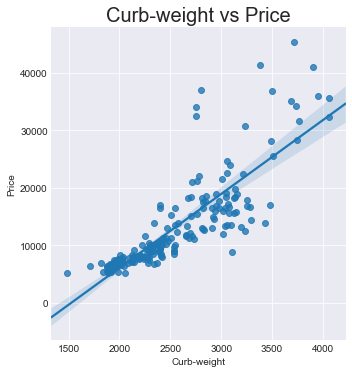

In [36]:
sns.lmplot(data=data, y='price',x='curb-weight')
plt.xlabel('Curb-weight',size=10)
plt.ylabel('Price',size=10)
plt.title('Curb-weight vs Price', size=20)
plt.show()

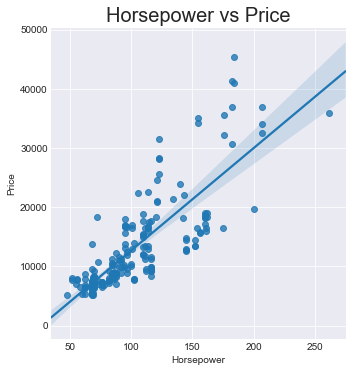

In [37]:
sns.lmplot(data=data, y='price',x='horsepower')
plt.xlabel('Horsepower',size=10)
plt.ylabel('Price',size=10)
plt.title('Horsepower vs Price', size=20)
plt.show()

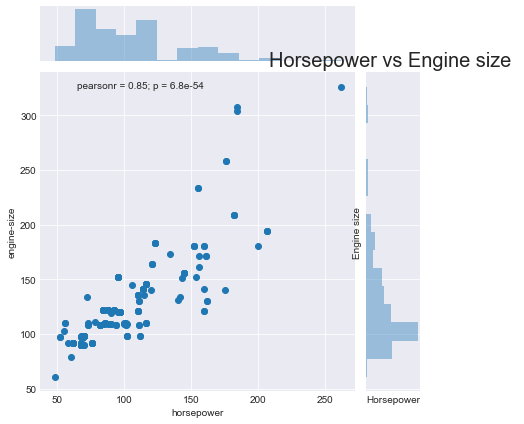

In [38]:
sns.jointplot(data=data, y='engine-size',x='horsepower')
plt.xlabel('Horsepower',size=10)
plt.ylabel('Engine size',size=10)
plt.title('Horsepower vs Engine size ', size=20)
plt.show()

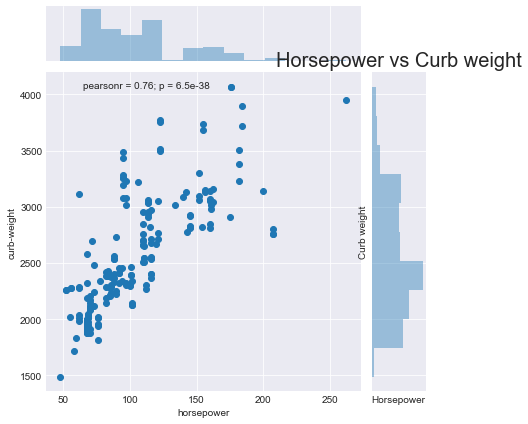

In [39]:
sns.jointplot(data=data, y='curb-weight',x='horsepower')
plt.xlabel('Horsepower',size=10)
plt.ylabel('Curb weight',size=10)
plt.title('Horsepower vs Curb weight', size=20)
plt.show()

 Distribution

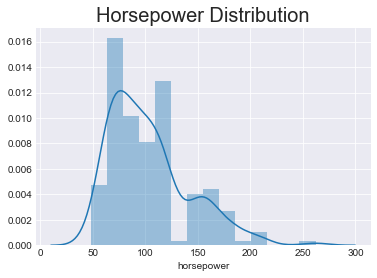

In [40]:
sns.distplot(data['horsepower'])
plt.title('Horsepower Distribution', size=20)
plt.show()

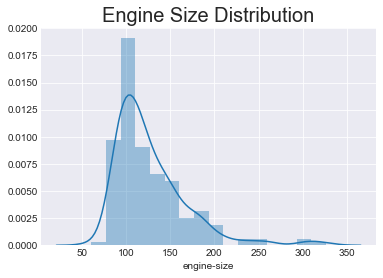

In [41]:
sns.distplot(data['engine-size'])
plt.title('Engine Size Distribution', size=20)
plt.show()

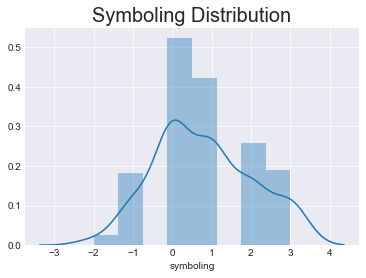

In [42]:
sns.distplot(data['symboling'])
plt.title('Symboling Distribution', size=20)
plt.show()

Categorical feautures

In [43]:
cate=data.select_dtypes(include=['object'])

In [44]:
cate.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


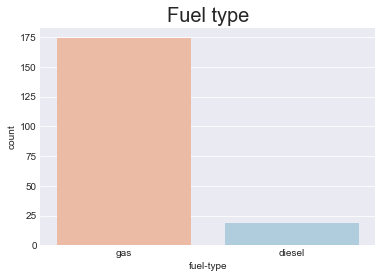

In [45]:
sns.countplot(x='fuel-type',data=data,palette='RdBu')
plt.title('Fuel type', size=20)
plt.show()

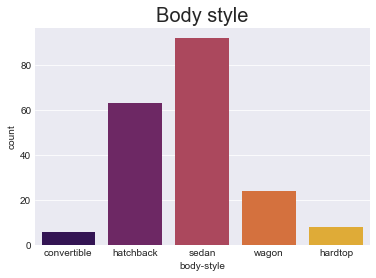

In [46]:
sns.countplot(x='body-style',data=data,palette='inferno')
plt.title('Body style', size=20)
plt.show()

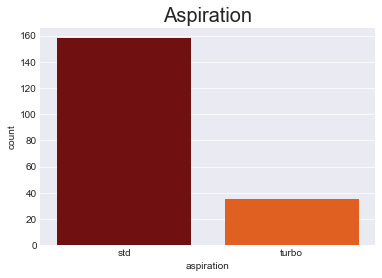

In [47]:
sns.countplot(x='aspiration',data=data,palette='gist_heat')
plt.title('Aspiration', size=20)
plt.show()

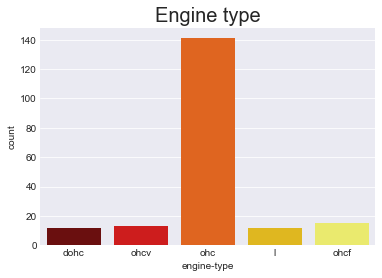

In [48]:
sns.countplot(x='engine-type',data=data,palette='hot')
plt.title('Engine type', size=20)
plt.show()

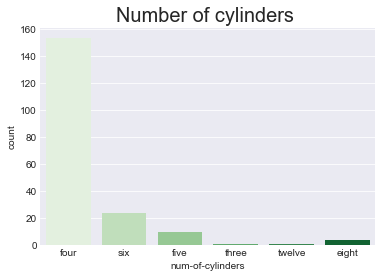

In [49]:
sns.countplot(x='num-of-cylinders',data=data,palette='Greens')
plt.title('Number of cylinders ', size=20)
plt.show()

Checking for outliers

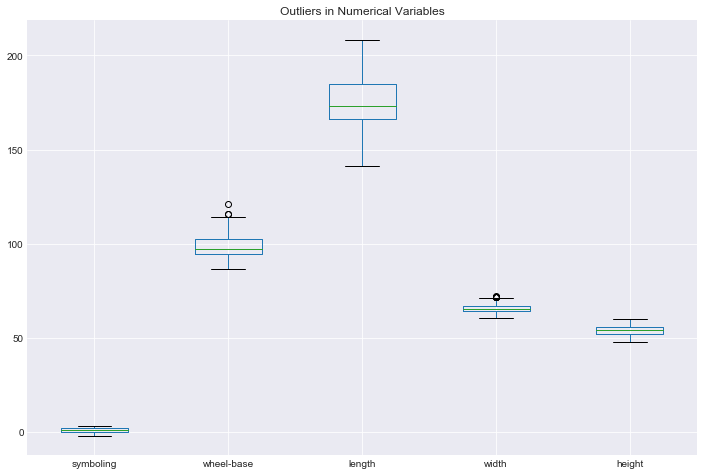

In [57]:
numeric_cols = ['symboling', 'wheel-base', 'length',
                'width', 'height'] 
plt.figure(figsize=(12,8))
plt.title("Outliers in Numerical Variables")
data[numeric_cols].boxplot()
plt.show()

To download data for further analysis

In [51]:
data.to_csv(r'C:\\Users\\Faith\\Desktop\\Automobile//df.csv')